<a href="https://colab.research.google.com/github/void-dono/anime-analysis/blob/main/anime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions


1.   Which Type of anime is in the dataset?
2.   Which and how much of Source materials is in dataset?
3.   How many anime are there for each Studio? 





In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
from matplotlib.pyplot import figure
!pip install pandas-bokeh
!pip install bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import Range1d
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [53]:
df= pd.read_csv('/content/MAL-data.csv')
df.reset_index(inplace=True) 

Now lets do the same thing to find out how many TV, Movies and OVAs are in top 500 entries

In [37]:
v1=df.groupby('Type')['index'].nunique()

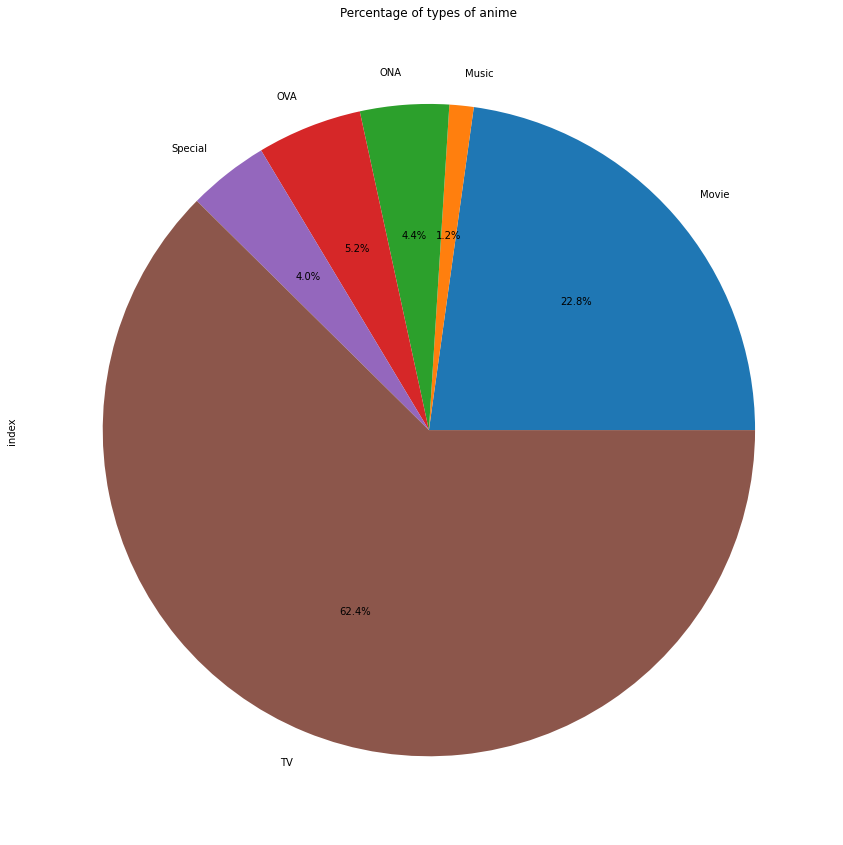

In [38]:
v1.plot.pie(autopct="%.1f%%", figsize=(20,15),title='Percentage of types of anime');

### 2.   Which and how much of Source materials is in dataset?

Now lets find out the number of source material types that made as anime.

In [39]:
v0 =df.groupby('Source')['index'].nunique()
vdf=pd.DataFrame({'Source':v0.index, 'number':v0.values})

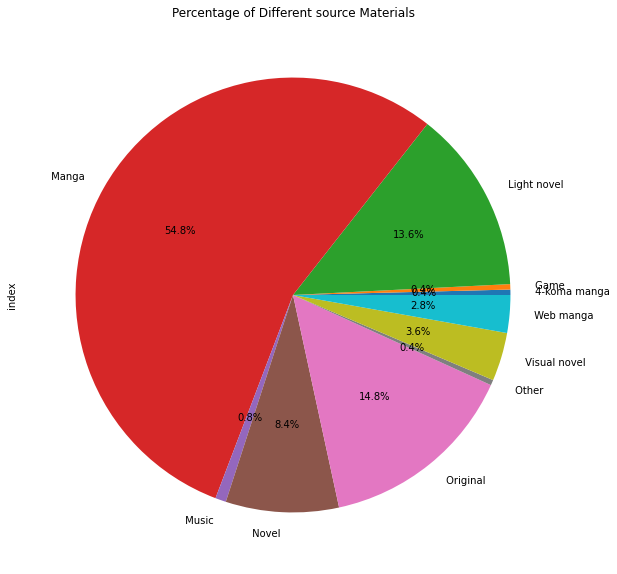

In [40]:
v0.plot.pie(autopct="%.1f%%",figsize=(10,10),title='Percentage of Different source Materials')

Now added I wanted to add inteactivity to chart. I found Bokeh Library is used to make interavtive plot so I tried it out. For this to work out i had to change the series to dataframe.

In [41]:
vdf.index=vdf['Source']
vdf.plot_bokeh.pie(y ='number')

__x__values_original


Figure(id='1903', ...)

As we can see that Manga has the highest converstion to anime followed by Original series which is not so surprising.

### 3.   How many anime are there for each Studio?

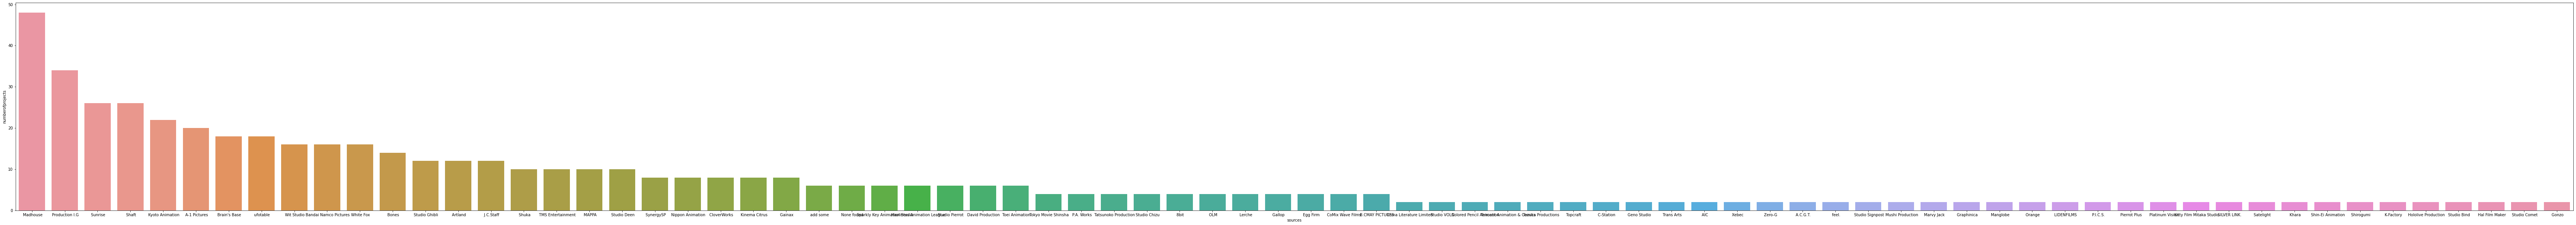

In [42]:
stu=df["Studio"].str.split(",", n = 3, expand = True)
stu=stu.unstack().reset_index(drop=True)
stu=pd.DataFrame(data=stu,columns=["Sources"])
stu = stu.fillna(value=np.nan)
stu=stu.dropna()
stu=stu.reset_index()
v2= stu.groupby('Sources')['index'].nunique()
v2=pd.DataFrame({'sources':v2.index, 'numberofprojects':v2.values})
v2=v2.sort_values(by=['numberofprojects'], ascending=False)
fig_dims = (120, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "sources", y = "numberofprojects", ax=ax, data=v2)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# Sources= v2['sources']
# Projects= v2['numberofprojects']
# #ax.bar(Sources, Projects)
# sns.barplot(x="sources", y = "numberofprojects" , data = v2, )
# plt.show()

In [43]:
df.corr()

,index,Rank,Rating,Episodes
index,1.000000,0.980002,-0.910379,0.022004
Rank,0.980002,1.000000,-0.935426,0.024781
Rating,-0.910379,-0.935426,1.000000,-0.035996
Episodes,0.022004,0.024781,-0.035996,1.000000


In [45]:
print(df.dtypes)

index          int64
Rank           int64
Title         object
Rating       float64
Genre         object
Members       object
Type          object
Episodes       int64
Licensor      object
Studio        object
Source        object
Duration      object
Premiered     object
Favorites     object
dtype: object


In [55]:
df['Members'].replace(',','', regex=True, inplace=True)
df['Favorites'].replace(',','', regex=True, inplace=True)

In [57]:
df['Members']=df['Members'].astype(str).astype(int)
df['Favorites']=df['Favorites'].astype(str).astype(int)

,index,Rank,Rating,Members,Episodes,Favorites
index,1.000000,0.980002,-0.910379,-0.250743,0.022004,-0.292171
Rank,0.980002,1.000000,-0.935426,-0.270117,0.024781,-0.313282
Rating,-0.910379,-0.935426,1.000000,0.295628,-0.035996,0.387653
Members,-0.250743,-0.270117,0.295628,1.000000,0.014505,0.851806
Episodes,0.022004,0.024781,-0.035996,0.014505,1.000000,0.099150
Favorites,-0.292171,-0.313282,0.387653,0.851806,0.099150,1.000000


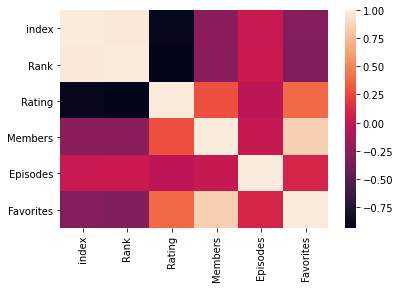

In [60]:
sns.heatmap(df.corr());
df.corr()

From this above Correlation matrix we can observe the factors that influence the rating on a anime:
1. Members play a role as the number of members is high the rating will also be high.
2. Favorites are also important for rating as having high number of favorites mean that anime is good.
3. Between rank and rating we see a negative correlation which seems right as the rank increases the rating of the show decreases.
4. One more interesting relation is that as rating of the anime increases  the number of episodes decreases. This might be because have more episodes makes it harder for audience to enjoy the show to its fullest. There is also the problem of fillers which make it hard to follow along the runtime of show.

Apart from rating there are some other insites which are really interesting.

*   When number of episodes increases there is a slight chance of favorite members also increasing. This might be because audience have time to truely understand the characters and start relate to them.
*   Members and favorites have a very high correlation when compared to other features. This is expected as number of members increases the chances of becoming a favorite is very likely.




# More Questions


4.   What is the idle episode number so that there is a high chance of getting into top anime?
5.   Lets also find which genere type is popular among top animes.

